### 추가 변수
- 시간대 : 폐점시간대, 오전, 오후, 백화점 마감이후 로 분할한 시간대에서 고객별 평균 객단가
- 주말변화 : 주말 방문비율의 변화(7분기 - 1분기)

In [23]:
import csv
import pandas as pd
data = pd.read_csv('./dataset/0329data.csv', encoding='cp949')
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data

,14년 1분기 구매,14년 2분기 구매,14년 3분기 구매,15년 1분기 구매,15년 2분기 구매,15년 3분기 구매,1분기 신장율,2분기 신장율,3분기 신장율,14년2분기 식료품 CV,...,시간1,시간2,시간3,시간4,연령대,지역명,경과일,주말변화,14년 4분기 구매,label
0,9141590,10783765,10781550,9302985,8595380,7806580,1.017655,0.797067,0.417657,1.0,...,0.0,121515.579268,98828.296078,38796.285714,9,0,9,0.154,23334762,0
1,14123470,10199760,14841180,18481480,9310130,13842600,1.308565,0.912779,1.134392,-0.4,...,0.0,145532.516556,127401.390476,0.000000,9,5,2,-0.193,7080920,1
2,302782,548433,648188,279310,312970,421017,0.922479,0.570662,0.654505,1.4,...,0.0,2713.485981,4270.698225,0.000000,9,32,9,0.231,394366,0
3,1309643,3732463,2434410,1737292,1919645,2127112,1.326539,0.514311,0.784777,2.4,...,0.0,17623.431034,23321.539568,0.000000,9,13,1,0.115,1823100,0
4,2166006,3115284,3163273,3619234,2769821,3518094,1.670925,0.889107,1.075914,0.2,...,0.0,21818.818182,15068.534884,0.000000,9,4,1,0.000,2950816,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,613130,913988,578210,850690,553590,252010,1.387455,0.605686,0.511703,1.6,...,0.0,5544.137931,1844.718519,5982.424242,2,21,3,-0.077,455450,1
18862,834049,2705917,2575628,1699930,767309,484920,2.038166,0.283567,0.163908,2.6,...,0.0,20171.615385,16449.575510,11174.120536,4,40,32,-0.039,2819868,0
18863,937734,2783122,2320105,2199423,2852695,1553645,2.345466,1.024998,0.796519,2.6,...,0.0,14246.957895,16670.564626,21440.000000,4,35,1,0.270,2042511,0
18864,449600,3321870,3160370,2896520,3625250,6322150,6.442438,1.091328,1.954314,0.2,...,0.0,34493.827160,60369.455587,17410.000000,4,19,6,0.154,5886390,0


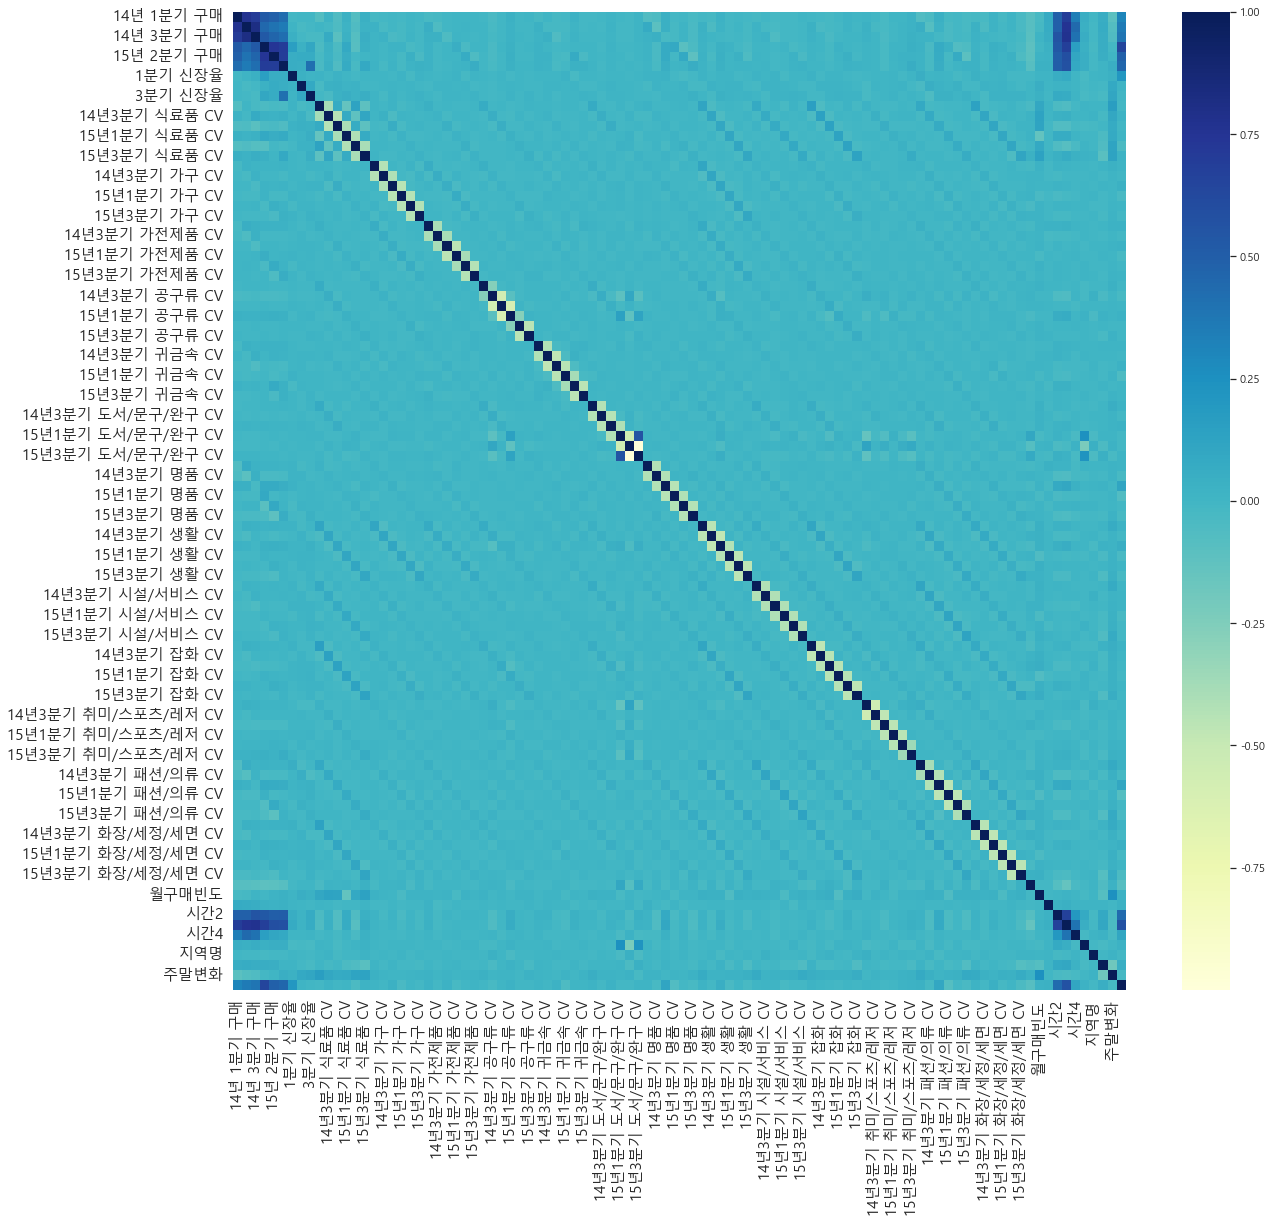

In [24]:
# standardScaler
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

df = data.drop('label',axis=1)
scale = StandardScaler()
df = pd.concat([pd.DataFrame(scale.fit_transform(df), columns=df.columns),
                data.label], axis=1)
df.head()

# hitmap
plt.figure(figsize=(20,18))
sns.heatmap(data.drop('label',axis=1).corr(), cmap='YlGnBu')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show() 

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier 

X1, X2, y1, y2 = train_test_split(data.drop('label', axis=1),
                                 data.label, test_size=0.2, random_state=4)

rf = RandomForestClassifier(max_depth=10, min_samples_leaf=10,
                           min_samples_split=4, n_estimators=100, random_state=0)
rf.fit(X1, y1)
pr1 = rf.predict(X2)
ac1 = accuracy_score(y2, pr1)

lr = LogisticRegression()
lr.fit(X1, y1)
pr2 = lr.predict(X2)
ac2 = accuracy_score(y2, pr2)

xgb = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb.fit(X1, y1, early_stopping_rounds=100, eval_metric="logloss",
       eval_set=[(X2,y2)], verbose=False)
pr3 = xgb.predict(X2)
prob = xgb.predict_proba(X2)[:,1]
ac3 = ac(y2, pr3)
roc = roc_auc_score(y2, prob)

# accuracy_score, LogisticRegression, XGBClassifier, roc_auc_score
print(ac1.round(3), ac2.round(3), ac3.round(3), roc.round(3))

0.746 0.719 0.773 0.863


### 최종

0.715 0.736 0.779 0.778 0.863 0.863


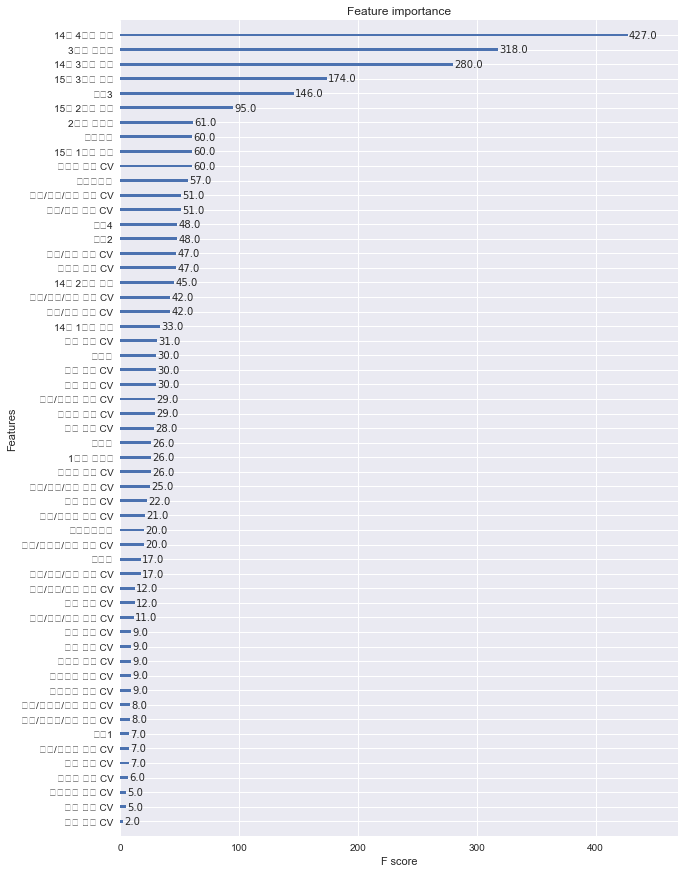

In [9]:
# <데이터 로드>
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

total_df = pd.read_csv('./dataset/0330data_add.csv',encoding='cp949')
total_df

# <스케일링>
from sklearn.preprocessing import StandardScaler
data = total_df.copy()

df = data.drop('label',axis=1)
scale = StandardScaler()
df = pd.concat([pd.DataFrame(scale.fit_transform(df), columns=df.columns),
                data.label], axis=1)
data_scaled = df

# <학습/예측> - add
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

X1, X_test, y1, y_test = train_test_split(data_scaled.drop('label', axis=1),
                                 data_scaled.label, test_size=0.2, random_state=4)
# 트레인 데이터를 트레인과 validation데이터로 나눔
X_train, X_val, y_train, y_val = train_test_split(X1,
                                 y1, test_size=0.2, random_state=4)

rf = RandomForestClassifier(max_depth=10, min_samples_leaf=10,
                           min_samples_split=4, n_estimators=100, random_state=0)
rf.fit(X1, y1)
pr1 = rf.predict(X_test)
ac1 = accuracy_score(y_test, pr1)

lr = LogisticRegression()
lr.fit(X1, y1)
pr2 = lr.predict(X_test)
ac2 = accuracy_score(y_test, pr2)

xgb = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss",
       eval_set=[(X_val,y_val)], verbose=False)
pr3 = xgb.predict(X_test)
prob3 = xgb.predict_proba(X_test)[:,1]
ac3 = accuracy_score(y_test, pr3)
roc3 = roc_auc_score(y_test, prob3)

lgbm = LGBMClassifier(n_estimators=400, learning_rate=0.1,max_depth=3)
lgbm.fit(X_train, y_train,early_stopping_rounds=100,eval_metric= 'logloss', 
       eval_set=[(X_val, y_val)], verbose=False)
pr4 = lgbm.predict(X_test)
prob4 = lgbm.predict_proba(X_test)[:,1]
ac4 = accuracy_score(y_test, pr4)
roc4 = roc_auc_score(y_test, prob4)

print(ac1.round(3), ac2.round(3), ac3.round(3), ac4.round(3), roc3.round(3), roc4.round(3))


# <변수 중요도>
from xgboost import plot_importance
import seaborn as sns, matplotlib.pyplot as plt
import matplotlib as mpl
import warnings 
warnings.filterwarnings('ignore')


plt.style.use('seaborn')

_, ax = plt.subplots(figsize=(10,15))

mpl.rc('font',family='Malgun') # 한글폰트 설정
mpl.rcParams['axes.unicode_minus'] = False # 마이너스 단위 설정
# ## 다크모드여서 흰색으로 표시
# [t.set_color('white') for t in ax.xaxis.get_ticklabels()]
# [t.set_color('white') for t in ax.yaxis.get_ticklabels()]
# ax.xaxis.label.set_color('white')
# ax.yaxis.label.set_color('white')
# ##
ax = plot_importance(xgb, ax=ax)
plt.yticks(fontsize=10)
plt.show()

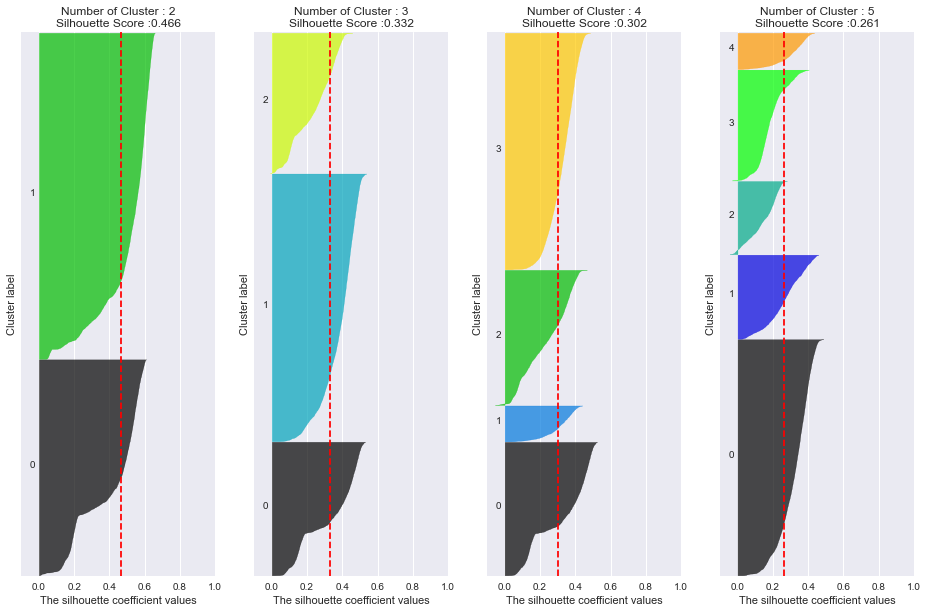

In [8]:
# <변수 중요도 데이터프레임>
import numpy as np
import warnings
warnings.filterwarnings('ignore')

feature_imp = pd.DataFrame(sorted(zip(xgb.feature_importances_,data.columns)), columns=['Value','Feature'])
feature_imp.sort_values(by="Value", ascending=False)[:30]

# <변수 중요도 역순으로 뽑아 보기>
feature_new = feature_imp.sort_values(by="Value", ascending=False)['Feature'][:-20:-1].tolist()
feature_new

# Silhouette Coefficient
from sklearn.decomposition import PCA
data_log = total_df.copy()

# 로그변환
df_temp = data.drop(['label','연령대','지역명','시간구매빈도','월구매빈도'],axis=1)
for i in df_temp.columns.tolist():
    data_log[i] = np.log1p(data_log[i])

def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import numpy as np
    plt.style.use('seaborn')
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 10), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

prediction = xgb.predict(data_scaled.drop('label',axis=1))
data2 = data_log.copy()
data2.label = prediction

data3 = data2.loc[data2.label == 0, :]

visualize_silhouette([2,3,4,5],data3.values)

In [10]:
from sklearn.cluster import KMeans
clusterer = KMeans(n_clusters = 3, max_iter=500, random_state=0)
cluster_labels = clusterer.fit_predict(data3.values)

data2['cluster'] = np.nan
data2.loc[data2.label == 0, 'cluster'] = cluster_labels
dd = pd.concat([total_df, data2['cluster']], axis=1)
dd.to_csv('./dataset/cluster_result.csv', index=False)
dd
# 군집화 붙이는 코드(원본인 total_df에 붙임)

,식료품 고가 CV,식료품 중가 CV,식료품 저가 CV,가구 고가 CV,가구 중가 CV,가구 저가 CV,가전제품 고가 CV,가전제품 중가 CV,가전제품 저가 CV,공구류 고가 CV,...,시간1,시간2,시간3,시간4,연령대,지역명,경과일,주말변화,label,cluster
0,0.133,0.454,0.646,0.0,0.0,0.790,1.000,0.967,0.0,0.0,...,0.0,121515.579268,98828.296078,38796.285714,9,0,9,0.154,0,1.0
1,0.200,0.390,0.414,0.0,0.0,0.203,0.847,0.557,0.0,0.0,...,0.0,145532.516556,127401.390476,0.000000,9,5,2,-0.193,1,NaN
2,0.539,0.347,0.405,0.0,0.0,0.000,0.000,0.000,0.0,0.0,...,0.0,2713.485981,4270.698225,0.000000,9,32,9,0.231,0,0.0
3,0.868,0.457,0.607,0.0,0.0,0.000,0.000,0.000,0.0,0.0,...,0.0,17623.431034,23321.539568,0.000000,9,13,1,0.115,0,NaN
4,0.555,0.551,0.485,0.0,0.0,0.000,0.000,0.000,1.0,0.0,...,0.0,21818.818182,15068.534884,0.000000,9,4,1,0.000,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,1.000,0.546,0.270,0.0,0.0,0.000,0.000,0.000,0.0,0.0,...,0.0,5544.137931,1844.718519,5982.424242,2,21,3,-0.077,1,2.0
18862,0.493,0.154,0.241,0.0,0.0,0.000,0.000,0.000,0.0,0.0,...,0.0,20171.615385,16449.575510,11174.120536,4,40,32,-0.039,0,0.0
18863,0.191,0.361,0.615,0.0,0.0,0.356,0.000,0.000,1.0,0.0,...,0.0,14246.957895,16670.564626,21440.000000,4,35,1,0.270,0,0.0
18864,1.000,0.404,0.506,0.0,0.0,0.000,0.000,0.000,0.0,0.0,...,0.0,34493.827160,60369.455587,17410.000000,4,19,6,0.154,0,2.0


In [11]:
cluster_df = pd.read_csv('./dataset/cluster_result.csv')
cluster_df

,식료품 고가 CV,식료품 중가 CV,식료품 저가 CV,가구 고가 CV,가구 중가 CV,가구 저가 CV,가전제품 고가 CV,가전제품 중가 CV,가전제품 저가 CV,공구류 고가 CV,...,시간1,시간2,시간3,시간4,연령대,지역명,경과일,주말변화,label,cluster
0,0.133,0.454,0.646,0.0,0.0,0.790,1.000,0.967,0.0,0.0,...,0.0,121515.579268,98828.296078,38796.285714,9,0,9,0.154,0,1.0
1,0.200,0.390,0.414,0.0,0.0,0.203,0.847,0.557,0.0,0.0,...,0.0,145532.516556,127401.390476,0.000000,9,5,2,-0.193,1,NaN
2,0.539,0.347,0.405,0.0,0.0,0.000,0.000,0.000,0.0,0.0,...,0.0,2713.485981,4270.698225,0.000000,9,32,9,0.231,0,0.0
3,0.868,0.457,0.607,0.0,0.0,0.000,0.000,0.000,0.0,0.0,...,0.0,17623.431034,23321.539568,0.000000,9,13,1,0.115,0,NaN
4,0.555,0.551,0.485,0.0,0.0,0.000,0.000,0.000,1.0,0.0,...,0.0,21818.818182,15068.534884,0.000000,9,4,1,0.000,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,1.000,0.546,0.270,0.0,0.0,0.000,0.000,0.000,0.0,0.0,...,0.0,5544.137931,1844.718519,5982.424242,2,21,3,-0.077,1,2.0
18862,0.493,0.154,0.241,0.0,0.0,0.000,0.000,0.000,0.0,0.0,...,0.0,20171.615385,16449.575510,11174.120536,4,40,32,-0.039,0,0.0
18863,0.191,0.361,0.615,0.0,0.0,0.356,0.000,0.000,1.0,0.0,...,0.0,14246.957895,16670.564626,21440.000000,4,35,1,0.270,0,0.0
18864,1.000,0.404,0.506,0.0,0.0,0.000,0.000,0.000,0.0,0.0,...,0.0,34493.827160,60369.455587,17410.000000,4,19,6,0.154,0,2.0


- 15년 구매액 / 전체 구매액
- 15년 구매액 = 전체 구매액
- 15년 구매액 > 14년 구매액

In [16]:
cluster_df = cluster_df.dropna()
cluster_df = cluster_df.drop('label', axis=1)

In [24]:
aa=cluster_df.groupby('cluster')

In [28]:
# 0이 압도적으로 많음
aa['지역명'].value_counts()

cluster  지역명
0.0      27      731
         33      566
         35      278
         41      168
         34      162
         40      123
         31      113
         29       57
         30       55
         32       43
         39       43
         37       31
         38       31
         26       25
         28       24
         36        6
1.0      5      3069
         6       438
         9       334
         0       326
         7       185
         10      172
         4       103
         2        87
         3        85
         8        49
         1        44
         11       32
2.0      20      943
         13      394
         15      195
         17      182
         14      158
         24      153
         16      121
         21       86
         25       81
         22       76
         19       61
         23       61
         18       51
         12       17
Name: 지역명, dtype: int64

In [22]:
cluster_df['가전제품 중가 CV'].value_counts()

0.000    7849
1.000     987
0.500      13
0.581       6
0.097       6
         ... 
0.532       1
0.987       1
0.553       1
0.585       1
0.146       1
Name: 가전제품 중가 CV, Length: 649, dtype: int64

In [23]:
cluster_df['가전제품 저가 CV'].value_counts()

0.000    7518
1.000    1230
0.500      16
0.333      15
0.167       8
         ... 
0.042       1
0.638       1
0.572       1
0.947       1
0.674       1
Name: 가전제품 저가 CV, Length: 664, dtype: int64

In [17]:
cluster_df.columns.tolist()[:10]

['식료품 고가 CV',
 '식료품 중가 CV',
 '식료품 저가 CV',
 '가구 고가 CV',
 '가구 중가 CV',
 '가구 저가 CV',
 '가전제품 고가 CV',
 '가전제품 중가 CV',
 '가전제품 저가 CV',
 '공구류 고가 CV']

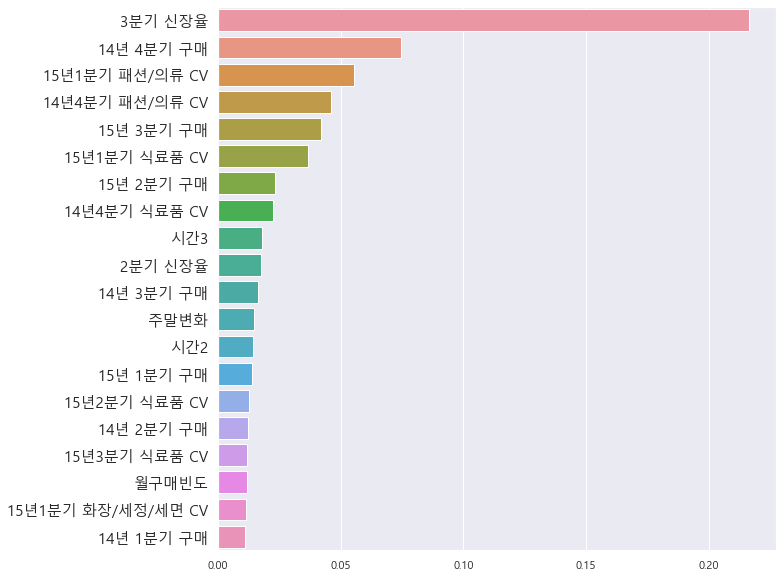

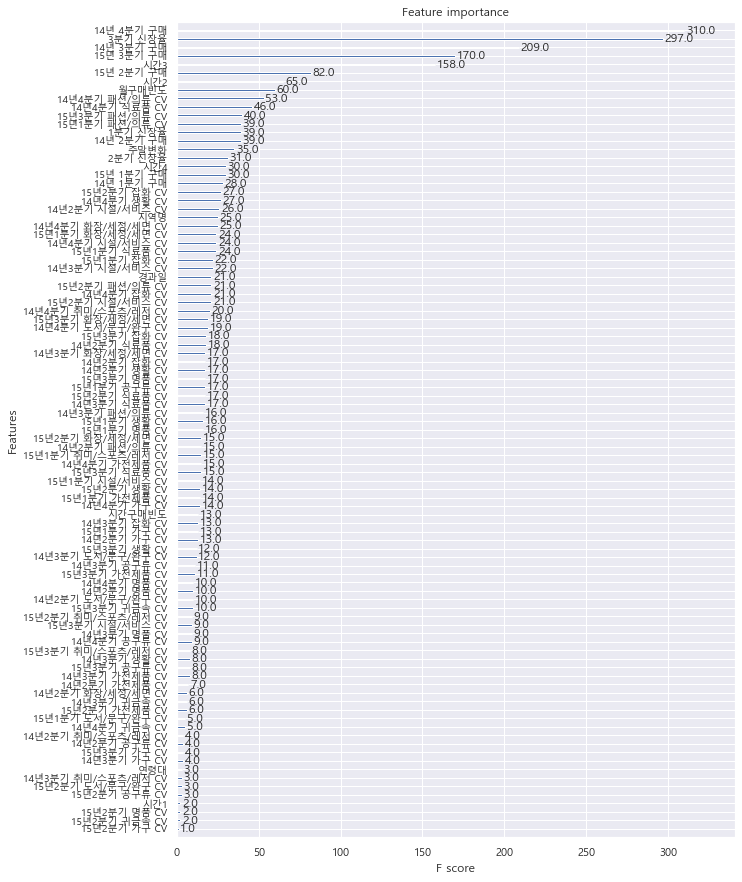

In [26]:
import seaborn as sns, matplotlib.pyplot as plt

ft = pd.Series(rf.feature_importances_, index=X1.columns)
top = ft.sort_values(ascending=False)[:20]
plt.figure(figsize=(10,10))
sns.barplot(x=top, y=top.index)
plt.yticks(fontsize=15)
plt.show()


from xgboost import plot_importance
_, ax = plt.subplots(figsize=(10,15))
plot_importance(xgb, ax=ax)
plt.yticks(fontsize=10)
plt.show() 